<a href="https://colab.research.google.com/github/Waldir0607/Proyecto-sobre-la-salud-mental-en-trabajadores-de-la-industria-tecnologica/blob/main/Proyecto_Salud_Mental_de_trabajadores_en_el_rubro_de_la_tecnolog%C3%ADal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('/content/survey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [134]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Iniciamos con el EDA

In [135]:
del df['Timestamp']

Buscamos duplicados

In [136]:
df.duplicated().sum()

4

Eliminamos los duplicados encontrados

In [137]:
df = df.drop_duplicates()

In [138]:
df.duplicated().sum()

0

Buscamos valores nulos

In [139]:
df.isnull().sum()

Age                             0
Gender                          0
Country                         0
state                         511
self_employed                  18
family_history                  0
treatment                       0
work_interfere                263
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1091
dtype: int64

Revisamos el porcentaje de nulos que tienen las características con estas para saber como tratarlas.

In [140]:
Porcentaje = df.isna().sum()
print((100*(Porcentaje/len(df))))

Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.717131
self_employed                 1.434263
family_history                0.000000
treatment                     0.000000
work_interfere               20.956175
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence               0.000000
comments                 

Realizamos una búsqueda de valores outliers

In [141]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Age:
Age
 29             85
 32             81
 26             75
 33             70
 27             70
 28             67
 31             67
 34             65
 30             63
 25             61
 35             54
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329 

In [142]:
del df['comments']

In [143]:
del df['phys_health_consequence']

Encontramos valores outliers en la columna **'Age'**, procederemos a eliminarlas

In [144]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

Revisamos que se hayan realizado los cambios corectamente.

In [145]:
df['Age'].value_counts()

Age
29    85
32    81
26    75
33    70
27    70
31    67
28    67
34    65
30    63
25    61
35    54
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: count, dtype: int64

Encontramos valores outliers en la columna 'Gender', procederemos a eliminarlas

In [146]:
Male = ['Male', 'male', 'M', 'm', 'Make', 'Male', 'Cis Male', 'Man', 'msle', 'male leaning androgynous', 'cis male',
         'Mail', 'Malr', 'Cis Man', 'maile', 'Mal', 'Male (CIS)']
Female = ['Female', 'female', 'F', 'f', 'Woman', 'Female', 'cis male', 'Female (cis)', 'cis-female/femme', 'femail',
           'Cis Female', 'woman', 'Femake']

df['Gender'] = df['Gender'].apply(lambda x: 'M' if x in Male else ('F' if x in Female else 'O'))

Revisamos que se hayan realizado los cambios corectamente.

In [147]:
df['Gender'].value_counts()

Gender
M    979
F    245
O     23
Name: count, dtype: int64

Encontramos valores outliers en la columna 'Country', procederemos a eliminarlas

In [148]:
df['Country'] = df['Country'].replace('Bahamas, The', 'Bahamas')

Revisamos que se hayan realizado los cambios corectamente.

In [149]:
df['Country'].value_counts()

Country
United States             746
United Kingdom            183
Canada                     72
Germany                    45
Ireland                    27
Netherlands                26
Australia                  21
France                     13
India                      10
Italy                       7
Sweden                      7
New Zealand                 7
Poland                      7
Switzerland                 7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Austria                     3
Russia                      3
Finland                     3
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Georgia                     1
Moldova                     1
China                       1
Denmark                     1
Thailand                    1
Cz

Nos enfocamos en nuestro objetivo de saber la salud mental en trabajadores en el rubro de la salud mental, así que filtramos esta.

In [150]:
filtro1 = df['tech_company'] == 'Yes'
df_tec = df[filtro1]
df_tec.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,F,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Maybe,Yes,No
2,32,M,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,No,Don't know,Somewhat difficult,No,Yes,Yes,Yes,Yes,No,No
3,31,M,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,M,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,M,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,Don't know,No,Yes,Yes,No,Maybe,Don't know,No


Ahora trataremos los valores nulos después que corregimos los valores outliers

In [151]:
df_tec.isnull().sum()

Age                            0
Gender                         0
Country                        0
state                        422
self_employed                 16
family_history                 0
treatment                      0
work_interfere               214
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

Corregimos valores nulos en la columna 'state'

In [152]:
# Obtener el valor más común (modo) de los estados para Estados Unidos
StateUSA = df_tec[df_tec['Country'] == 'United States']['state'].mode()[0]

# Rellenar los valores faltantes en la columna 'state' de manera manual
df_tec.loc[(df_tec['Country'] == 'United States') & (df_tec['state'].isna()), 'state'] = StateUSA
df_tec.loc[(df_tec['Country'] != 'United States') & (df_tec['state'].isna()), 'state'] = 'Unknown'

Revisamos que se hayan realizado los cambios corectamente.

In [153]:
df_tec['state'].isnull().sum()

0

Corregimos valores nulos en la columna 'work_interfere'

In [154]:
# Rellenar los valores faltantes en 'work_interfere' de manera manual basado en 'treatment'

# Obtener los valores más comunes (modo) de 'work_interfere' para cada grupo de 'treatment'
ModaTreatSi = df_tec[df_tec['treatment'] == 'No']['work_interfere'].mode()[0]
ModaTreatNo = df_tec[df_tec['treatment'] == 'Yes']['work_interfere'].mode()[0]

# Rellenar los valores faltantes
df_tec.loc[(df_tec['treatment'] == 'No') & (df_tec['work_interfere'].isna()), 'work_interfere'] = ModaTreatSi
df_tec.loc[(df_tec['treatment'] == 'Yes') & (df_tec['work_interfere'].isna()), 'work_interfere'] = ModaTreatNo

Revisamos que se hayan realizado los cambios corectamente.

In [155]:
df_tec['work_interfere'].isnull().sum()

0

Corregimos valores nulos en la columna 'self_employed'

In [156]:
df_tec = df_tec.dropna(subset=['self_employed'])

Revisamos que se hayan realizado los cambios corectamente.

In [157]:
df_tec['self_employed'].isnull().sum()

0

Revisamos nuestros datos

In [158]:
df_tec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 18 to 1257
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1006 non-null   int64 
 1   Gender                     1006 non-null   object
 2   Country                    1006 non-null   object
 3   state                      1006 non-null   object
 4   self_employed              1006 non-null   object
 5   family_history             1006 non-null   object
 6   treatment                  1006 non-null   object
 7   work_interfere             1006 non-null   object
 8   no_employees               1006 non-null   object
 9   remote_work                1006 non-null   object
 10  tech_company               1006 non-null   object
 11  benefits                   1006 non-null   object
 12  care_options               1006 non-null   object
 13  wellness_program           1006 non-null   object
 14  seek_help   

In [159]:
df_tec.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,M,United States,MD,Yes,Yes,No,Sometimes,1-5,Yes,...,Don't know,Yes,Very easy,No,Yes,Yes,No,Yes,Yes,Yes
19,36,M,France,Unknown,Yes,Yes,No,Never,6-25,Yes,...,No,Yes,Somewhat easy,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,M,United States,NY,No,Yes,Yes,Sometimes,100-500,No,...,No,No,Somewhat difficult,Maybe,Some of them,Some of them,No,No,No,No
21,31,M,United States,NC,Yes,No,No,Never,1-5,Yes,...,No,Yes,Somewhat difficult,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,M,United States,MA,No,No,Yes,Often,26-100,Yes,...,No,Don't know,Don't know,Maybe,Some of them,Yes,No,Maybe,No,No


# Realizamos visualizaciones de los hallazgos mas importantes

# GRAFICO 1

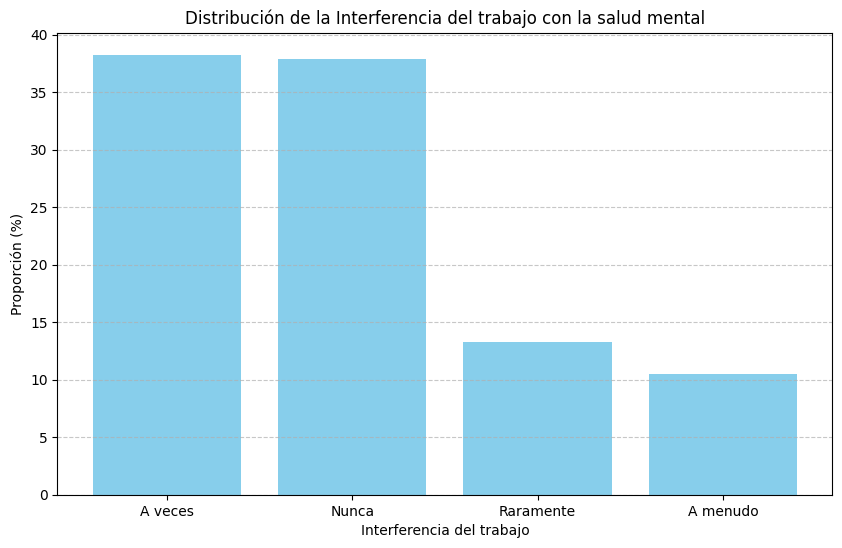

In [160]:
# Calcular la distribución en porcentajes
work_interfere_distribution_percentage = df_tec['work_interfere'].value_counts(normalize=True) * 100

# Crear una lista ordenada de los índices traducidos
translated_indices = ['A veces', 'Nunca','Raramente', 'A menudo']
work_interfere_distribution_percentage.index = translated_indices

# Generar la visualización en porcentajes con traducción manual
plt.figure(figsize=(10, 6))
plt.bar(translated_indices, work_interfere_distribution_percentage, color='skyblue')
plt.title('Distribución de la Interferencia del trabajo con la salud mental')
plt.xlabel('Interferencia del trabajo')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La primera visualización muestra la distribución de cómo el trabajo interfiere con la salud mental de los encuestados en empresas de tecnología. Los resultados indican:

Sometimes (A veces): La mayoría de los encuestados (38.27%) experimentan interferencia del trabajo con su salud mental a veces.
Never (Nunca): Un porcentaje similar (37.87%) reporta no experimentar ninguna interferencia.
Rarely (Raramente): Un 13.32% indica que raramente su trabajo interfiere con su salud mental.
Often (Frecuentemente): El 10.54% de los encuestados señala que su trabajo frecuentemente interfiere con su salud mental.
Este análisis sugiere que una parte significativa de los trabajadores en el sector tecnológico experimenta algún grado de interferencia entre su trabajo y su salud mental.

# GRAFICO 2

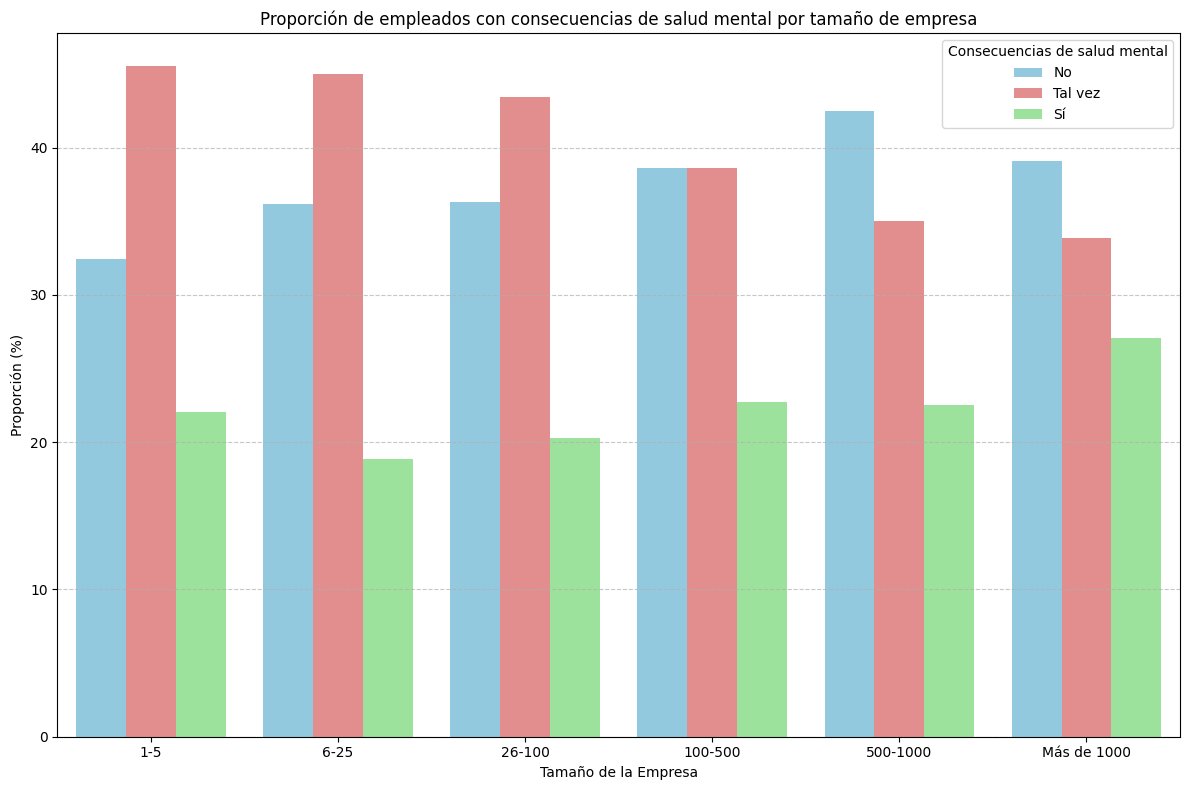

In [161]:
import seaborn as sns

# Preparar los datos para seaborn
df_plot = no_employees_distribution_ordered.reset_index().melt(id_vars='index')
df_plot.columns = ['Tamaño de la Empresa', 'Consecuencias de Salud Mental', 'Proporción']
# Crear la visualización con seaborn con la leyenda traducida y manteniendo los colores
plt.figure(figsize=(12, 8))
sns.barplot(data=df_plot, x='Tamaño de la Empresa', y='Proporción', hue='Consecuencias de Salud Mental', palette=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Proporción de empleados con consecuencias de salud mental por tamaño de empresa')
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Proporción (%)')
# Traducir la leyenda y mantener los colores
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No', 'Tal vez', 'Sí']
plt.legend(handles, labels, title='Consecuencias de salud mental')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretación de los Resultados
Grandes Empresas (1000+ empleados): Una proporción significativa de empleados en grandes empresas reportan consecuencias de salud mental, lo que puede indicar la necesidad de mejorar las políticas de bienestar en entornos laborales más grandes.
Pequeñas y Medianas Empresas: Las empresas pequeñas y medianas (6-100 empleados) también muestran una alta proporción de empleados con consecuencias de salud mental. Esto resalta la necesidad de recursos y apoyo en empresas de todos los tamaños.
Próximos Pasos
Con base en estos hallazgos, se recomienda:

Evaluar Programas en Grandes Empresas: Las grandes empresas deben revisar y mejorar sus programas de bienestar para abordar las necesidades de sus empleados.
Apoyo a Pequeñas y Medianas Empresas: Proporcionar recursos y orientación a las pequeñas y medianas empresas para implementar políticas de bienestar efectivas.

In [128]:
del df_tec['phys_health_interview']

In [129]:
del df_tec['tech_company']

Realizaremos un modelo de ML que nos ayude a predecir como el trabajo interfiere en la salud mental

# Pre procesamiento

In [164]:
X = df_tec.drop('work_interfere', axis=1)
y = df_tec['work_interfere']

In [162]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df_tec[column].value_counts())
    print("\n")

Value counts for Age:
Age
32    69
26    66
29    64
33    63
27    61
31    57
28    56
34    52
30    52
25    49
24    41
35    40
23    37
37    31
38    29
36    29
40    26
39    24
43    21
22    20
41    17
42    12
21     9
45     9
46     9
19     8
44     6
50     6
18     6
48     5
20     5
56     4
51     4
49     4
57     3
54     2
55     2
60     2
47     2
58     1
62     1
53     1
61     1
Name: count, dtype: int64


Value counts for Gender:
Gender
M    806
F    182
O     18
Name: count, dtype: int64


Value counts for Country:
Country
United States             598
United Kingdom            137
Canada                     52
Germany                    40
Ireland                    26
Netherlands                24
Australia                  17
France                     12
India                       9
Switzerland                 7
Poland                      7
Sweden                      7
New Zealand                 6
Brazil                      6
Italy             

In [163]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the columns for each type of preprocessing
ordinal_cols = ['leave', 'no_employees', 'work_interfere']
standard_cols = ['Age']
onehot_cols = [col for col in df_tec.columns if col not in ordinal_cols + standard_cols]

# Define the transformers for each type of preprocessing
ordinal_transformer = OrdinalEncoder()
standard_transformer = StandardScaler()
onehot_transformer = OneHotEncoder(drop='first', sparse=False)

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_cols),
        ('std', standard_transformer, standard_cols),
        ('ohe', onehot_transformer, onehot_cols)
    ]
)

# Apply the preprocessing
processed_data = preprocessor.fit_transform(df_tec)

# Convert the result back to a DataFrame for easier inspection
processed_data_df = pd.DataFrame(processed_data, columns=[
    *ordinal_cols,
    'Age_scaled',
    *preprocessor.transformers_[2][1].get_feature_names_out(onehot_cols)
])



# Display the first few rows of the processed data
processed_data_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,leave,no_employees,work_interfere,Age_scaled,Gender_M,Gender_O,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,4.0,0.0,3.0,1.965156,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,2.0,4.0,0.0,0.573038,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,3.0,-0.401445,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,-0.123021,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,2.0,1.0,1.965156,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(processed_data_df,y,test_size=0.3,random_state=42)

In [170]:
X_train

,leave,no_employees,work_interfere,Age_scaled,Gender_M,Gender_O,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
543,2.0,5.0,2.0,-1.654351,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
442,0.0,4.0,0.0,-0.679868,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
915,3.0,2.0,1.0,-0.819080,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
398,0.0,4.0,0.0,2.243579,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
960,0.0,1.0,1.0,-0.540657,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,2.0,0.0,-1.097504,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
270,4.0,2.0,0.0,1.965156,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,2.0,4.0,1.0,-0.958292,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
435,2.0,1.0,2.0,-0.123021,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [171]:
y_train

660        Rarely
538         Never
1140        Often
484         Never
1200        Often
          ...    
134         Never
335         Never
1063        Often
531        Rarely
130     Sometimes
Name: work_interfere, Length: 704, dtype: object

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Entrenar el modelo RandomForest
rndf_reg = RandomForestClassifier(n_estimators=45, random_state=42)
rndf_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = rndf_reg.predict(X_test)

# Calcular la exactitud del modelo
accuracy = rndf_reg.score(X_test, y_test) * 100

# Mostrar los resultados
y_pred, y_test.values, accuracy

(array(['Never', 'Sometimes', 'Rarely', 'Sometimes', 'Rarely', 'Never',
        'Sometimes', 'Never', 'Sometimes', 'Sometimes', 'Sometimes',
        'Sometimes', 'Rarely', 'Rarely', 'Often', 'Never', 'Never',
        'Sometimes', 'Often', 'Sometimes', 'Sometimes', 'Never',
        'Sometimes', 'Never', 'Never', 'Sometimes', 'Never', 'Sometimes',
        'Sometimes', 'Never', 'Rarely', 'Often', 'Rarely', 'Sometimes',
        'Rarely', 'Never', 'Sometimes', 'Sometimes', 'Sometimes',
        'Sometimes', 'Never', 'Sometimes', 'Never', 'Never', 'Sometimes',
        'Never', 'Sometimes', 'Never', 'Sometimes', 'Sometimes',
        'Sometimes', 'Never', 'Sometimes', 'Never', 'Rarely', 'Never',
        'Sometimes', 'Sometimes', 'Never', 'Often', 'Sometimes', 'Rarely',
        'Never', 'Sometimes', 'Never', 'Sometimes', 'Never', 'Never',
        'Sometimes', 'Never', 'Never', 'Never', 'Never', 'Never', 'Often',
        'Sometimes', 'Sometimes', 'Never', 'Sometimes', 'Never', 'Never',
        'S